<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/master/01_AritmeticaPuntoFlotante/06_Notacion_fl_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Notación $fl(x)$ y análisis del Error hacia atrás</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M.en.C. Miguel Angel Pérez León.</i></h5>
    <h5 align="center"><i>Ayudante: Jesús Iván Coss Calderón.</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico.</i></h5>
  </font>

## Introducción

Dado que gran parte de los errores al utilizar una computadora para realizar algún calculo se encuentran en las operaciones aritméticas empleadas en el mismo, pongamos especial atención en estas.

Para ilustrar esto supongamos que trabajamos con una computadora que emplea $\color{red}{5}$ $\color{red}{cifras}$ $\color{red}{ significativas}$ y deseamos sumar 2 números. Estos 2 números de máquina en notación de punto flotante normalizada serian:

$$a=0.37218\times10^{4} \quad b=0.71422\times10^{-1}$$

Muchas computadoras realizan sus operaciones en un área del doble del tamaño, supongamos que se tiene un acumulador de tamaño 10, así que la suma se vería de la siguiente manera.

$$\frac{\begin{array}{c}
\,\,\,\,\,\,\,\,\,\,\,a=0.3721800000\times10^{4}\\
\,\,\,\,\,\,\,\,\,\,\,b=0.0000071422\times10^{4}
\end{array}}{a+b=0.3721871422\times10^{4}}$$

El número de máquina más cercano es $c=0.37219\times10^{4}$ (empleando redondeo al más cercano) y el error relativo involucrado en esta operación aritmética seria.

$$a+b=0.3721871422\times10^{4}-0.37219\times10^{4}=0.0000028578\times10^{4}$$

$$\left|\frac{x-fl(x)}{x}\right|=\left|\frac{a+b-c}{a+b}\right|=\frac{0.0000028578\times10^{4}}{0.3721871422\times10^{4}}=\frac{0.0000028578}{0.3721871422}=0.000007678 \thickapprox 0.77\times10^{-5}$$

Este error seria aceptable en una máquina de tan poca precisión, **pero no en para una computadora empleada para realizar cálculos que tengan que ver con ciencias exactas**.

Para facilitar el análisis de tales errores es conveniente continuar utilizando $fl(x)$ para denotar el número de máquina de punto flotante correspondiente al numero $x$.

Por supuesto que la función $fl$ depende completamente de la computadora implicada.

De acuerdo al redondeo el resultado de esta operación aritmética seria.

$$fl(a+b)=fl(0.3721871422\times10^{4})=0.37219\times10^{4}$$

Es decir que para el ejemplo mostrado, el error relativo cumple con que $0.77\times10^{-5} \leq u$

Para una computadora de longitud de palabra de 32 bits (precisión simple), previamente se mostró que si $x\in\mathbb{R},\,x\neq0$ y $x$ se encuentra en el rango de números de máquina entonces.

$$\left|\frac{x-fl(x)}{x}\right|\leq u \quad (u=2^{-24}) \tag{1}$$

En pocas palabras este resultado establece que el valor real $x$ y su representación $fl(x)$ en número de máquina difieren a lo más en $u$ unidad de redondeo, si es que se emplea redondeo al más cercano.


##  Notación $fl(x)$ y análisis de sus concecuencias

De aquí en adelante asumimos que se emplea redondeo al más cercano y por lo tanto la desigualdad anterior (1) se puede expresar en forma más útil.

$$fl(x)=x(1+\delta) \quad (\left|\delta\right|\leq2^{-24}) \tag{2}$$

Para ver que estas dos expresiones matemáticas $(1)$ y $(2)$ son equivalentes, basta con tomar $\frac{x-fl(x)}{x}=\delta$ en (1), es decir.

$$\left|\frac{x-fl(x)}{x}\right|\leq 2^{-24} \quad $$

Entonces por la desigualdad (1), se tiene que $\left|\delta\right|\leq2^{-24}$ y despejando $fl(x)$ se obtiene (2).

$$\left|\frac{x-fl(x)}{x}\right|\leq 2^{-24}\Longrightarrow \frac{fl(x)-x}{x} \leq 2^{-24} \Longrightarrow fl(x)-x=\delta x\Longrightarrow fl(x)=x+\delta x\Longrightarrow fl\left(x\right)=x\left(1+\delta\right)$$

Sin embargo por (2), $\delta$ está acotada por la unidad de redondeo, así que lo que establecen (1) y en consecuencia (2) es que el error asociado a la aproximación de un valor real $x$ no puede exceder la unidad de redondeo $u$ ya que si lo excede, en particular podría tomar el valor del $\epsilon_m$ lo que significa que la aproximación **$fl(x)$ en realidad sería el siguiente valor** representable en este sistema.

## Arimética de punto flotante

Ya que se tiene una idea clara de cómo funcionan los sistemas de punto flotante y el redondeo, es buena idea destinar un poco de tiempo para analizar que sucede con las operaciones aritméticas, dentro de un sistema de punto flotante.

### Operaciones aritméticas

Se empleara el símbolo $\odot$ para denotar cualquiera de las operaciones de la aritméticas tradicionales $(+,-,\times,\div)$.

Supongamos una computadora de longitud de palabra de 32 bits que se ha diseñado para que siempre que 2 números de máquina $x$ y $y$ se combinen aritméticamente produzcan $fl(x\odot y)$ en lugar de $x\odot y$.


Podemos imaginar que $x \odot y$ se forma primero correctamente, después se normaliza y por último se redondea para convertirse en un número de máquina. Bajo esta suposición, el error relativo no excede $2^{-24}$, es decir. 

$$fl(x\odot y)=(x\odot y)(1+\delta) \quad \left|\delta\right|\leq2^{-24}$$

#### Ejemplo

Empleando aritmética de 7 cifras significativas y redondeo en base 10, realice los siguientes cálculos. 

*   Sean $a= 1234.567, b= 45.67844, c = 0.0004$

> $$(a + b) + c=(1234.567+45.67844)+0.0004=1280.245+0.0004=1280.245$$

> $$a + (b + c)=1234.567+(45.67844+0.0004)=1234.567+45.67884=1280.246$$

*   Sean $a= 1234.567, b= 1.234567, c = 3.333333$

> $$(a + b) * c=(1234.567+1.234567)+3.333333=1235.801*3.333333=4119.336$$

> $$(a * c)+(b * c)=(1234.567*3.333333)+(1.234567*3.333333)=4115.223+4.115223=4119.338$$

De estos ejemplos podemos concluir que algúnos de **los axiómas elementales (en este caso asocitividad y distributividad) de las matemáticas no siempre se cúmplen** en un sistema de punto flotante.



## Cancelación numérica

El termino de cancelación numérica se refiere a que sucede cuando 2 cifras muy similares se restan, en ese caso la mayoria de las cifras significativas se cancelan (en otras palabras se vuelven cero) y dadas las limitaciones del sistema, los valores cencuentes son cero.


### Ejemplo

Uno de los cálculos más comunes que producen errores tiene que ver con la cancelación de cifras significativas, debido a la resta de números casi iguales.

Supongamos que tenemos 2 números de máquina casi iguales $x,\,\,y$ con $x>y$, y con una representación de *p-cifras* significativas. Es decir.


$$fl(x)=0.d_{1}d_{2}...d_{k}a_{k+1}a_{k+2}...a_{p}\times10^{n}\\
fl(y)=0.d_{1}d_{2}...d_{k}b_{k+1}b_{k+2}...b_{p}\times10^{n}$$ 


Al realizar la resta de $x-y$ se tienen a lo mas $p-k$ cifras significativas, sin embargo el resultado debe mostrarse con p-cifras, así que las ultimas k-cifras o se cancelan o serán asignadas al azar.


En todos los cálculos posteriores que involucren a $x-y$, se arrastrará un error debido a la cancelación de cifras.

$\color{green}{Ejemplo.}$

Sean $x=0.54617\times10^{0}$ y $y=0.54601\times10^{0}$ números reales, el valor exacto de la resta es 


$$r=x-y={\color{red}{0.00016}}$$

* Ahora, supongamos que la resta se realiza con una aritmética de 4-cifras, al redondear $x,\,\,y$ a 4-cifras se tiene.

$$x=0.5462 \quad y=0.5460\\x-y={\color{red}{0.0002}} $$

Dado que el resultado también debe estar normalizado entonces $fl(x-y)=0.2\overset{{\color{red}{c.can}}}{\overbrace{000}}\times10^{-3} $

* ¿Que sucede con el error relativo?.

* ¿Que sucede con el error relativo sin en lugar de redondear, se empleara truncamiento?.


## Nociones de estabilidad numérica

Para el caso particular de la suma de 2 números reales $x,\,\,y$ tendríamos que.

$$fl(x+y)=(x+y)(1+\delta)=x(1+\delta)+y(1+\delta)$$

Esta expresión nos dice que el resultado de sumar 2 números reales $x,\,\,y$, no es en general $x+y$ si no la suma verdadera de $x(1+\delta)$ con $y(1+\delta)$.

Así, la versión de máquina de $x+y$, que es $fl(x+y)$, es la suma exacta de una $x,\,\,y$ ligeramente perturbadas.

Esta interpretación es un ejemplo del **análisis de error hacia atrás**. Este trata de determinar que perturbación de los datos originales causaría que los resultados de la computadora fueran los resultados exactos de un problema dado.

Dado que ya conocemos la importancia de los errores en el análisis de algoritmos, a partir de este punto se introducen 2 formas para analizar el error en un algoritmo:

Sea $ \hat{f}\left(x\right)$ el valor aproximado calculado de $f\left(x\right)$ con un dato de
entrada $x$. Entonces tenemos lo siguiente:

*   **Error hacı́a adelante** $= |f (x) − \hat{f}(x)|$.
Los errores atrasados relacionan los errores a los datos del
problema en lugar de a la solución del problema.
*   **Error hacı́a atrás** $= |y − x|$. Aquı́ nos preguntamos con qué valor de los
datos de entrada y hace que $f(y) = \hat{f}(x)$.



#### Ejemplo

Supongamos que queremos estimar $f(x)=e^x$ en $x=1$. Utilizando la serie de Taylor como algoritmo de aproximaxición se tiene.

$$\hat{f}\left(x\right)=1+x+\frac{x^{2}}{2}+\frac{x^{3}}{3!}$$

Entonces tenemos que $f(1)=2.718$ y $\hat{f}(1)=2.666$, así que.

*   **Error hacia adelante**: $|2.718 − 2.666| = 0.052$.
*   Para encontrar el error hacia atrás tenemos que encontrar una $y$ tal que $f(y)=\hat{f}(1)$. Para $e^x$, se tiene que $y=ln(\hat{f}(x))$. Evaluando en $x=1$ tenemos que $y=ln(\hat{f}(1))=0.9808$. De tal manera que el **error hacia atrás** es $|y-x|=|0.9808-1|=0.0192$. Y al verificar se tiene que $e^y = e^{0.9808}=2.666=\hat{f}(1)=2.666$


## Algoritmo estable hacia atrás

Definición: Un algoritmo es llamado estable hacıia atrás si para alguna $x$ se produce un valor $\hat{f}(x)$ con un pequeño error hacı́a atrás. En otras palabras, un algoritmo es estable hacı́a atrás si se produce una solución exacta cercana al problema. Esto es, un algoritmo es estable hacia atrás si $\hat{f}(x)=f(y)$, para alguna $y$ cerca a $x$.

#### Ejemplo

Si $x,\,y,\,z$ son números de máquina en una computadora de longitud de palabra de 32 bits. ¿Que cota superior tendrá el error de redondear $z(x+y)$?

* Primero se evalúa $fl(x+y)=(x+y)(1+\delta_{1})\quad(\left|\delta_{1}\right|\leq2^{-24})$.


* Ahora tenemos que multiplicar $z$ por el número de máquina $fl(x+y)$, es decir.

$$fl[zfl(x+y)]=zfl(x+y)(1+\delta_{2})\quad(\left|\delta_{2}\right|\leq2^{-24})$$

* En este cálculo, $\left|\delta_{1}\delta_{2}\right|\leq2^{-48}$, por lo que lo ignoramos (ya que es un valor mucho muy pequeño). También hacemos 

$$\delta=\delta_{1}+\delta_{2}$$

* Juntando ambas ecuaciones se tiene

$$fl[zfl(x+y)]	=	z(x+y)(1+\delta_{1})(1+\delta_{2})
	=	z(x+y)(1+\delta_{1}+\delta_{2}+\delta_{1}\delta_{2})
	\thickapprox z(x+y)(1+\delta_{1}+\delta_{2})
	=	z(x+y)(1+\delta) \quad (\left|\delta_{1}\right|\leq2^{-23})$$
    
y entonces se puede concluir que 

$$\left|\delta\right|=\left|\delta_{1}+\delta_{2}\right|\leq\left|\delta_{1}\right|+\left|\delta_{2}\right|\leq2^{-24}+2^{-24}=2^{-23} $$

Ası́, que el cálculo de la multiplicación de $z$ por la suma de dos números de punto flotante $x, y$
es la multiplicación exacta de $z'$ por la suma exacta de otros dos números de punto flotante $x'$ e $y'$.
Como $|\delta|\leq \epsilon_m$, por lo tanto $x'$, $y'$ y $z'$ son cercanos a $x$, $y$ y $z$ respectivamente. Ası́ concluimos que la operación de multiplicación de un número de punto flotante por la adición de dos números de punto flotante es estable hacı́a atrás.

## Reducción de errores

Para concluir este tema podemos decir que el objetivo general del curso será reducir los errores que se den en los cálculos, ya sea debido a las limitantes del sistema de punto flotante o a las caracteristicas de las técnicas empleadas para aproximar los valores reales.

Así que ya podemos ver de manera más clara el por que el algoritmo de Horner es un ejemplo excelente para mostrar tales fines.

### Evaluación de polinomios

Hasta este momento debe ser claro que una forma para reducir los errores es minimizar la cantidad de operaciones necesarias para realizar algún cálculo.

* Evalúa el siguiente polinomio en 4.71.

$$f(x)=1.5+3.2x-6.1x^{2}+x^{3}$$


* Considera una aritmética de 3 cifras significativas y responde:

    * ¿Cuál es el valor exacto?.

    * Emplea truncamiento.

    * Emplea redondeo.

    * ¿Qué sucede con el error relativo en ambos casos?.

    * Ahora reescribe el mismo polinomio pero en la forma 
$$f(x)=1.5+x(3.2+x(-6.1+x))$$

    * Responde las mismas preguntas.
 
$\color{green}{Ejercicio}$

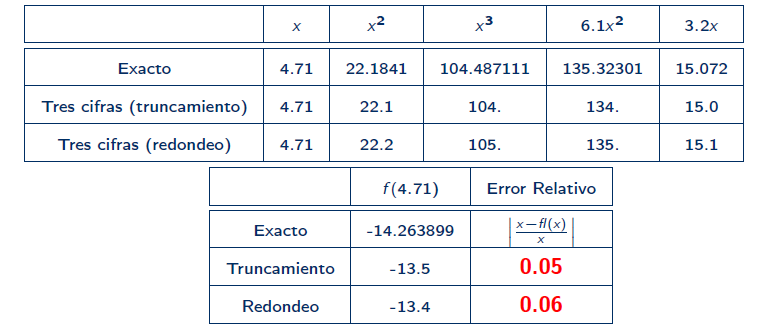
    
Ahora reescribimos $f (x)$ en forma de multiplicaciones anidadas y volvemos a evaluar

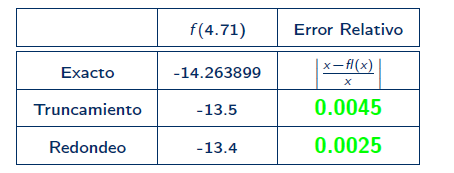

El **anidamiento** redujo el error relativo por truncamiento a menos de 10% del original. Para la aproximación por redondeo la mejora fue más drástica, el error se redujo en un 95%.

### Multiplicación Anidada

Como podrás notar por el ejemplo anterior al escribir el polinomio en forma de multiplicación anidada, se redujo el error debido a la reducción de operaciones, que paso de ser 5 multiplicaciones y 3 sumas a 2 multiplicaciones y 3 sumas.

Ahora, veamos algunas observaciones relevantes sobre la evaluación de polinomios eficientemente, así como del redondeo y truncamiento de números reales, para evaluar el polinomio

$$p(x)=a_{0}+a_{1}x+a_{2}x+\cdots+a_{n-1}x^{n-1}+a_{n}x^{n}$$

Agrupemos los termino en una multiplicaciones anidadas de la siguiente forma

$$p(x)=a_{0}+x(a_{1}+x(a_{2}+\cdots+x(a_{n-1}+xa_{n}))\cdots))$$

A este procedimiento se le conoce con el nombre de algoritmo de Horner o división sintética.

## Algoritmo de Horner

### FLOP's

De acuerdo en la sección pasada y al algoritmo de Horner, el polinomio $p(x)$ se puede reescribir de varias formas, con la finalidad de realizar menos operaciones, que dicho sea de paso, cuando estas operaciones se realizan en una computadora, se le conocen como **operaciones de punto flotante o FLOP's**, por sus siglas en inglés. Estas pueden ser **operaciones aritméticas**, de asignación o incluso sentencias tipo if else.

 
De manera mas clara, el algoritmo de Horner dice que la evaluación de p(x) es mas eficiente si se realiza de la siguiente manera. 

$$p(x)=a_{0}+a_{1}x+\cdots+a_{n}x^{n}=\sum_{i=0}^{n}a_{i}x^{i}=\sum_{i=0}^{n}(a_{i}\prod_{j=1}^{i}x)$$

Y recordemos que si $n\leq m$, entonces.

$$\sum_{k=n}^{m}x_{k}=x_{n}+x_{n+1}+\cdots+x_{m}\,\,\,y\,\,\,\prod_{k=n}^{m}x_{k}=x_{n}x_{n+1}\cdots x_{m}$$

Por otro lado, $si m<n$, se define

$$\sum_{k=n}^{m}x_{k}=0\,\,\,y\,\,\,\prod_{k=n}^{m}x_{k}=1$$

Ahora seria interesante responder un par de preguntas:

¿De que depende el número de FLOP's al evaluar un polinomio?.

Si se evalúa el polinomio $p(x)$ de manera tradicional, ¿cuántas FLOP's se tienen que realizar?.

Al emplear el algoritmo de Horner, ¿cuántas FLOP's se realizan?.

### Como se hacia en Mesopotamia.

$\color{green}{Ejemplo.}$


Use el algoritmo de Horner para evaluar $p(3)$

$$p(x)=x^{4}-4x^{3}+7x^{2}-5x-2$$

Acomodemos los coeficientes de $p(x)$ y el valor de x en la siguiente tabla

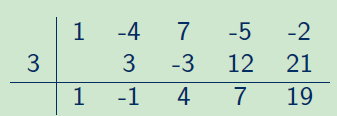

Por lo que obtenemos que $p(3)=19$ y se puede reescribir el polinomio así

$$p(x)=(x-3)(x^{3}-x^{2}+4x+7)+19$$

Si el numero evaluado resulta ser raíz entonces $(x-r)$ es un factor de p.

$\color{green}{Ejemplo.}$


Use el algoritmo de Horner para evaluar $p(2)$

$$p(x)=x^{4}-4x^{3}+7x^{2}-5x-2$$

Acomodemos los coeficientes de $p(x)$ y el valor de x en la siguiente tabla

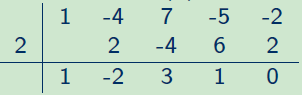

Dado que la evaluación da como resultado 0, entonces 2 es raíz de p y 

$$p(x)=(x-2)(x^{3}-2x^{2}+3x+1)$$

<font color="blue" face="Comic Sans MS,arial">
  <h1 align="center"><i>Ahora veamos como lo haría un alumno de la Facultad de Ciencias, en el año 2019</i></h1>
  </font>

### Pseudocódigo

A continuación, se muestra el pseudocódigo para poder realizar la evaluación del polinomio $p(x)$.

![Horner](https://docs.google.com/uc?export=download&id=1cSLWd7EKGS9bx1XyUqru805eQHu3AWM0)

Para este algoritmo, suponemos que se los valores de los coeficientes $a_{0}a_{1}\ldots a_{n}$ han sido almacenados en un arreglo lineal (lista) y por lo tanto es fácil acceder a cada uno de ellos para realizar las evaluaciones.

En forma de pseudocódigo resulta mas sencillo saber cuantas FLOP's se realizaron.

Programalo en $\color{green}{Python!}$

In [ ]:
def horner(n,lista,x):
    p=lista[n]
    pol=[]
    for i in range(n-1,0,-1):
        pol.append(p)
        p=lista[i]+x*p
    pol.append(p)
    return pol

lista=[-2,-5,7,-4,1]
coef=horner(4,lista,3)
print("los coeficientes resultantes son: {}".format(coef))

los coeficientes resultantes son: [1, -1, 4, 7]


## Referencias

1. Riswan Butt: Numerical Analysys Using Matlab, Jones and Bartlett.

2. Ward Cheney, David Kincaid: Métodos Numéricos y Computación, Cenage Learning.

3. Richard L. Burden, J. Douglas Faires: Análisis Numérico, Math Learning.